In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np


In [2]:
dataset_seeds = pd.read_csv('seeds.csv') 

In [3]:
dataset_seeds.head()

,area,perimeter,compactness,length.kernel,width.kernel,asymmetry.coefficient,length.kernel.groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
dataset_seeds.describe()

,area,perimeter,compactness,length.kernel,width.kernel,asymmetry.coefficient,length.kernel.groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [5]:
X = dataset_seeds.iloc[:, [0,1, 2, 3, 4, 5, 6]].values

In [6]:
y=dataset_seeds.iloc[:,7:8]

In [7]:
# K Means Cluster, con una cantidad de 3 clusters
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# Segun el modelo y el entrenamiento de las variables X, tenemos los clusters y su identificación para cada registro
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
# contando la cantidad de cluster del modelo
pd.value_counts(model.labels_)

2    77
0    72
1    61
dtype: int64

In [10]:
# contando la cantidad de cluster de los datos reales y['winetype']
pd.value_counts(y['type'])

3    70
2    70
1    70
Name: type, dtype: int64

In [11]:
# convertimos los 0s a 2s y los 2s a 3s, cluster del modelo
pred_y = np.choose(model.labels_, [1, 2, 3]).astype(np.int64)

In [12]:
# contando la cantidad de cluster de los datos reales y['winetype']
pd.value_counts(y['type'])

3    70
2    70
1    70
Name: type, dtype: int64

In [13]:
# contando la cantidad de cluster del modelo
pd.value_counts(model.labels_)

2    77
0    72
1    61
dtype: int64

In [14]:
# convirtiendo "y" en array
y = np.array(y)

In [15]:
# contando la cantidad de cluster del modelo, convertido 0s a 2s y 2s a 3s
pd.value_counts(pred_y)

3    77
1    72
2    61
dtype: int64

In [16]:
# métrica
sm.accuracy_score(y, pred_y)

0.8952380952380953

In [17]:
sm.confusion_matrix(y, pred_y)

array([[60,  1,  9],
       [10, 60,  0],
       [ 2,  0, 68]])

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

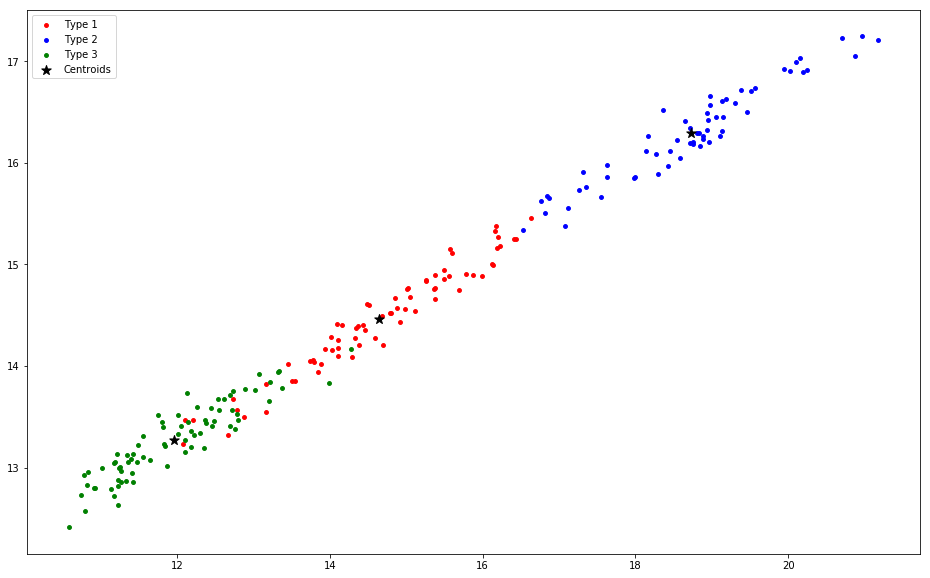

In [32]:
#Visualising the clusters
plt.figure(figsize=(16, 10))  
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 15, c = 'red', label = 'Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 15, c = 'blue', label = 'Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 15, c = 'green', label = 'Type 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100,marker = "*" ,  c = 'black', label = 'Centroids')

plt.legend()